#行銷分析方法
▼協同過濾法 --> 推薦相似產品給相似客戶

▼各國客戶購買清單差異  --> 廣告推播本國最大購買量商品列表

▼銷售額最大的客戶群折扣看購買清單  --> 分析使用VIP專案

▼針對銷售額不好的產品打折 --> 促銷方式增加營業額

#引入檔案

In [1]:
import pandas as pd
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(file_path)

In [2]:
import math
import numpy as np

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#視覺化

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

#資料處裡

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


##刪除取消訂單


In [6]:
#用df.loc將原始df中Quantity列中大於0的欄取出存成新的df
df = df.loc[df["Quantity"]>0]
df.shape

(531285, 8)

##刪除顧客ID缺失

In [7]:
#用dropna將CustomerID此列中NA值的行刪除
df = df.dropna(subset = ["CustomerID"])
df.shape
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


##新增日期(年月日)列

In [8]:
#引入datetime
import datetime

In [9]:
#新增一列為newInvoiceDate，其值為InvoiceDate中取出年月日的部分
df["newInvoiceDate"] = df["InvoiceDate"].dt.strftime("%Y-%m-%d")

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newInvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01


##新增營業額(Revenue)

In [11]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [12]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newInvoiceDate,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,54.08


In [13]:
#排除StockCode為POST的資料(郵資)
df = df[df["StockCode"]!="POST"]
#排除StockCode為M的資料(人工)
df = df[df["StockCode"]!="M"]

##將不變的數值參數轉為字串

In [14]:
df["UnitPrice"] = df["UnitPrice"].astype(str)
df["CustomerID"] = df["CustomerID"].astype(str)
df["InvoiceNo"] = df["InvoiceNo"].astype(str)

#客戶項目矩陣分析

##樞紐分析表

In [15]:
# pivot table
# 樞紐分析表
# 針對顧客ID與產品標號分析
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
customer_item_matrix.shape

(4336, 3663)

樞紐分析表  以0,1編碼

In [17]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
#applymap()對資料框所有元素套用指定函數
#applymap() applies the specified function to all elements of the data frame
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#▼Collaborative Filtering 協同過濾法

##相似性(Similarity)計算

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

### 3.1. User-based Collaborative Filtering
### 3.1. 使用者導向的協同過濾法

##### - User-to-User Similarity Matrix
##### - 使用者之間的餘弦相似度

In [19]:
#建立相似度矩陣
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)
#建立Index
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()#顯示矩陣前5行

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.064505,0.046449,0.049266,0.039153,0.0,0.025876,0.136641,0.095648,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109573,0.012828
12348.0,0.0,0.064505,1.000000,0.000000,0.000000,0.000000,0.0,0.028653,0.121046,0.121046,...,0.0,0.065795,0.116642,0.0,0.000000,0.000000,0.0,0.000000,0.175260,0.085229
12349.0,0.0,0.046449,0.000000,1.000000,0.029463,0.124878,0.0,0.030949,0.032686,0.130744,...,0.0,0.106600,0.000000,0.0,0.039284,0.000000,0.0,0.068041,0.138336,0.030686
12350.0,0.0,0.049266,0.000000,0.029463,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.046335,0.000000


##找與特定客戶的相似度排序

In [20]:
user_user_sim_matrix.loc["12380.0"].sort_values(ascending=False).head(11)#找除了自己以外的10位客戶
#sort()用以對資料加以排序  
#ascending() --> 升/降序排序 True=升序 False=降序,默認值為True

CustomerID
12380.0    1.000000
13178.0    0.458982
14680.0    0.429617
16748.0    0.424795
15810.0    0.395348
14489.0    0.376969
12373.0    0.349957
12715.0    0.342105
17669.0    0.341993
12724.0    0.338255
12530.0    0.324443
Name: 12380.0, dtype: float64

##取得客戶A的購買清單

In [21]:
import numpy as np 
series = pd.Series(customer_item_matrix.loc["12380.0"])
series

StockCode
10002           0
10080           0
10120           0
10125           0
10133           0
               ..
90214Z          0
BANK CHARGES    0
C2              0
DOT             0
PADS            0
Name: 12380.0, Length: 3663, dtype: int64

In [22]:
result = series.to_numpy().nonzero()
result

(array([  76,   92,   93,   97,   98,   99,  100,  101,  103,  294,  353,
         498,  500,  507,  517,  518,  575,  594,  618,  682,  780,  818,
         823,  824,  839, 1106, 1133, 1135, 1136, 1160, 1161, 1167, 1168,
        1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1195, 1196, 1230,
        1231, 1259, 1294, 1411, 1448, 1538, 1731, 1849, 1917, 1952, 1959,
        1961, 1964, 1966, 1967, 1996, 1997, 2000, 2012, 2014, 2058, 2113,
        2217, 2421, 2980, 2981, 3286, 3287, 3288, 3289, 3343, 3345]),)

In [23]:
#iloc()以第n筆來選擇資料
items_bought_by_A = set(customer_item_matrix.loc["12380.0"].iloc[result].index)
items_bought_by_A

{20685,
 20712,
 20713,
 20719,
 20723,
 20724,
 20725,
 20726,
 20728,
 21121,
 21212,
 21429,
 21439,
 21452,
 21463,
 21464,
 21578,
 21621,
 21648,
 21731,
 21883,
 21931,
 21936,
 21937,
 21976,
 22299,
 22326,
 22328,
 22329,
 22355,
 22356,
 22362,
 22363,
 22379,
 22380,
 22381,
 22382,
 22383,
 22384,
 22385,
 22386,
 22398,
 22399,
 22435,
 22436,
 22467,
 22504,
 22628,
 22668,
 22759,
 22960,
 23084,
 23156,
 23191,
 23199,
 23201,
 23204,
 23206,
 23207,
 23236,
 23237,
 23240,
 23254,
 23256,
 23310,
 23369,
 23480,
 '47590A',
 '47590B',
 70006,
 '84997A',
 '84997B',
 '84997C',
 '84997D',
 '85099B',
 '85099F'}

##取得客戶B的購買清單

In [24]:
#iloc()以第n筆來選擇資料
items_bought_by_B = set(customer_item_matrix.loc["13178.0"].iloc[
    customer_item_matrix.loc["13178.0"].to_numpy().nonzero()
].index)
items_bought_by_B

{'16161P',
 '16161U',
 20681,
 20682,
 20712,
 20713,
 20717,
 20718,
 20719,
 20723,
 20724,
 20725,
 20726,
 20727,
 20728,
 20749,
 20750,
 21429,
 21495,
 21498,
 21499,
 21500,
 21558,
 21559,
 21561,
 21731,
 21891,
 21929,
 21930,
 21931,
 21935,
 21936,
 21937,
 22045,
 22089,
 22090,
 22144,
 22149,
 22243,
 22326,
 22327,
 22328,
 22329,
 22352,
 22355,
 22356,
 22379,
 22380,
 22381,
 22382,
 22383,
 22384,
 22385,
 22386,
 22411,
 22431,
 22432,
 22433,
 22467,
 22502,
 22629,
 22630,
 22633,
 22661,
 22706,
 22707,
 22865,
 22866,
 23084,
 23201,
 23202,
 23203,
 23206,
 23207,
 23208,
 23209,
 23230,
 23231,
 23232,
 23254,
 23255,
 23256,
 23475,
 23476,
 23477,
 23478,
 23480,
 23545,
 23583,
 '84997A',
 '84997B',
 '84997D',
 '85099B',
 '85099C',
 '85099F'}

In [25]:
#找出顧客A曾買過，而顧客B未曾買過的商品推薦給顧客B
# Next, take customer 17935 as the target, and the recommendation strategy is to promote to customer 17935 
# the products that customer 12350 has purchased but customer 17935 has not purchased yet
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B

items_to_recommend_to_B

{20685,
 21121,
 21212,
 21439,
 21452,
 21463,
 21464,
 21578,
 21621,
 21648,
 21883,
 21976,
 22299,
 22362,
 22363,
 22398,
 22399,
 22435,
 22436,
 22504,
 22628,
 22668,
 22759,
 22960,
 23156,
 23191,
 23199,
 23204,
 23236,
 23237,
 23240,
 23310,
 23369,
 '47590A',
 '47590B',
 70006,
 '84997C'}

#★取得相似客戶推薦購買清單

In [26]:
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

#isin() --> 接受一個列表，判斷該列中元素是否在列表中。可同時對多列使用

,Description
StockCode,
22960,JAM MAKING SET WITH JARS
21883,STARS GIFT TAPE
84997C,BLUE 3 PIECE POLKADOT CUTLERY SET
21212,PACK OF 72 RETROSPOT CAKE CASES
21463,MIRRORED DISCO BALL
21464,DISCO BALL ROTATOR BATTERY OPERATED
22435,SET OF 9 HEART SHAPED BALLOONS
20685,DOORMAT RED RETROSPOT
22759,SET OF 3 NOTEBOOKS IN PARCEL


#▼各國客戶購買清單差異

##資料處理

取出前5大購買量國家進行後續分析

In [27]:
#依國家小計加總
country_count = df.groupby(["Country"]).sum()
#依數量排序
country_count = country_count.sort_values(["Quantity"],ascending=False)
#重設Index
country_count = country_count.reset_index()
#選出要檢視的列[:,[列名稱]]
country_count = country_count.loc[:,["Country", "Quantity"]]
#顯示前5筆資料
country_count.head(5)

,Country,Quantity
0,United Kingdom,4262297
1,Netherlands,200834
2,EIRE,140523
3,Germany,118140
4,France,110640


排除英國後

In [28]:
#選第2個國家至第11個國家，並將Index設為國家
country_count_woUK = country_count[1:11].set_index("Country")
country_count_woUK

,Quantity
Country,
Netherlands,200834
EIRE,140523
Germany,118140
France,110640
Australia,84208
Sweden,36042
Switzerland,29981
Spain,27742
Japan,26016


In [29]:
#將國家名單獨取出存成list
country_count0 = country_count.drop(["Quantity"],axis = 1)["Country"].tolist()
country_count0

['United Kingdom',
 'Netherlands',
 'EIRE',
 'Germany',
 'France',
 'Australia',
 'Sweden',
 'Switzerland',
 'Spain',
 'Japan',
 'Belgium',
 'Norway',
 'Portugal',
 'Finland',
 'Channel Islands',
 'Denmark',
 'Italy',
 'Cyprus',
 'Singapore',
 'Austria',
 'Israel',
 'Poland',
 'Canada',
 'Iceland',
 'USA',
 'Unspecified',
 'Greece',
 'United Arab Emirates',
 'Malta',
 'Czech Republic',
 'Lithuania',
 'European Community',
 'Lebanon',
 'Brazil',
 'RSA',
 'Bahrain',
 'Saudi Arabia']

依國家將資料存成list

In [30]:
#建立df1為空list
df1 = []
#迴圈國家總數
for i in range(len(country_count0)):
  #將國家各別依照數量排列並存入df1的list中
  df1.append(df.loc[df["Country"] == country_count0[i]].sort_values(by = ["Quantity"],ascending=False))

In [31]:
df1[0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newInvoiceDate,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011-12-09,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,77183.60
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,2011-11-25,0.00
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-27,1008.00
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-27,3096.00
...,...,...,...,...,...,...,...,...,...,...
83556,543309,20971,PINK BLUE FELT CRAFT TRINKET BOX,1,2011-02-07 12:05:00,1.25,18118.0,United Kingdom,2011-02-07,1.25
83555,543309,20967,GREY FLORAL FELTCRAFT SHOULDER BAG,1,2011-02-07 12:05:00,3.75,18118.0,United Kingdom,2011-02-07,3.75
83554,543309,20969,RED FLORAL FELTCRAFT SHOULDER BAG,1,2011-02-07 12:05:00,3.75,18118.0,United Kingdom,2011-02-07,3.75
83553,543309,20971,PINK BLUE FELT CRAFT TRINKET BOX,1,2011-02-07 12:05:00,1.25,18118.0,United Kingdom,2011-02-07,1.25


##各國購買數量

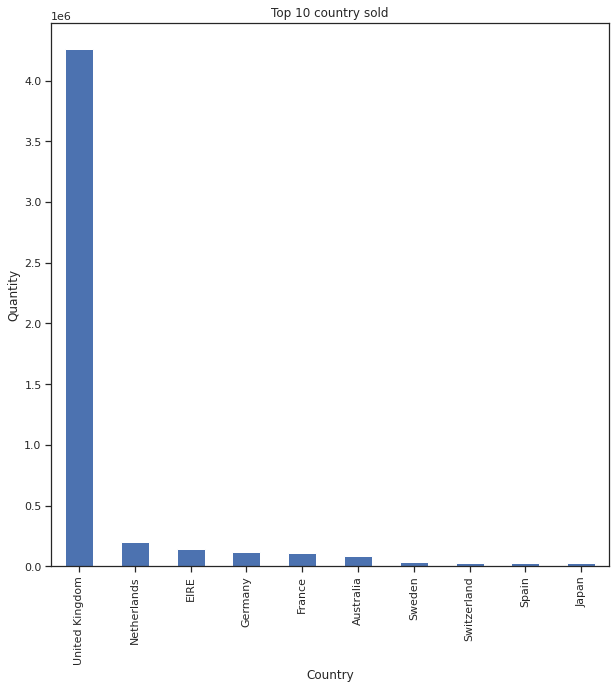

In [32]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
country_count.set_index("Country").head(10)['Quantity'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 country sold')
# show the plot 顯示圖形
plt.show()

##各國購買數量(排除英國)

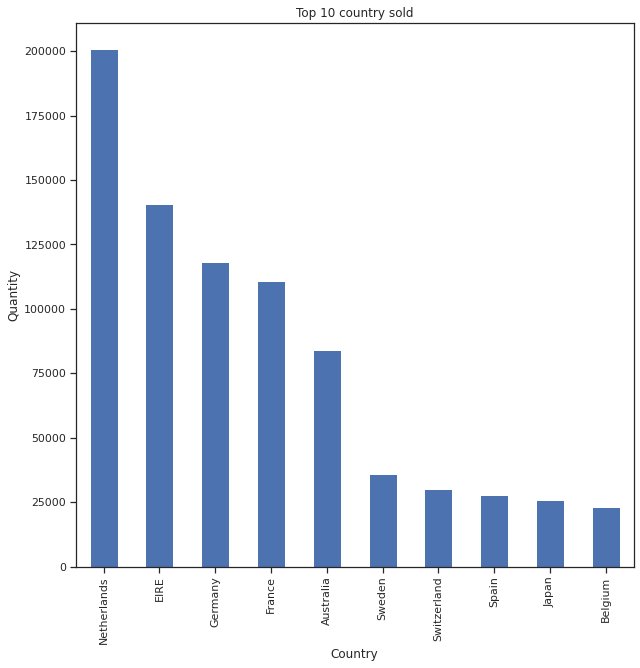

In [33]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
country_count_woUK['Quantity'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 country sold')
# show the plot 顯示圖形
plt.show()

##選出購買國家第一位

In [34]:
df1[0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newInvoiceDate,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011-12-09,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,77183.60
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,2011-11-25,0.00
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-27,1008.00
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-27,3096.00
...,...,...,...,...,...,...,...,...,...,...
83556,543309,20971,PINK BLUE FELT CRAFT TRINKET BOX,1,2011-02-07 12:05:00,1.25,18118.0,United Kingdom,2011-02-07,1.25
83555,543309,20967,GREY FLORAL FELTCRAFT SHOULDER BAG,1,2011-02-07 12:05:00,3.75,18118.0,United Kingdom,2011-02-07,3.75
83554,543309,20969,RED FLORAL FELTCRAFT SHOULDER BAG,1,2011-02-07 12:05:00,3.75,18118.0,United Kingdom,2011-02-07,3.75
83553,543309,20971,PINK BLUE FELT CRAFT TRINKET BOX,1,2011-02-07 12:05:00,1.25,18118.0,United Kingdom,2011-02-07,1.25


###★大部分被購買的產品
可優先推薦此國家的人購買

In [35]:
#將購買國家第一位的總表df1[0]依照商品小計，並依照數量排序
dfplot1_1 = df1[0].groupby(["StockCode"]).sum().sort_values(by = ["Quantity"],ascending=False)
#接著只取數量列及前十項觀看
dfplot1_1 = dfplot1_1.loc[:,["Quantity"]].head(10)
dfplot1_1
#全部可以寫成dfplot1_1 = df1[0].groupby(["StockCode"]).sum().sort_values(by = ["Quantity"],ascending=False).loc[:,["Quantity"]].head(10)

,Quantity
StockCode,
23843,80995
23166,76919
84077,49182
22197,45632
85099B,41981
85123A,34705
84879,32727
22616,24337
17003,22711


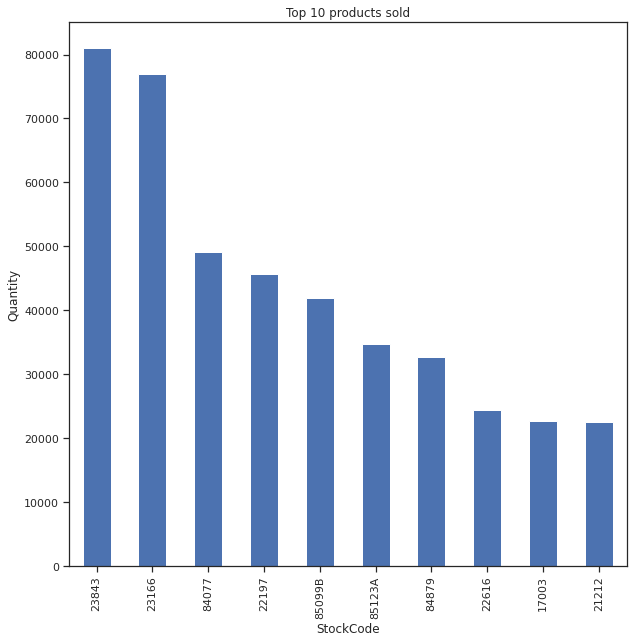

In [36]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
dfplot1_1['Quantity'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.title('Top 10 products sold')
# show the plot 顯示圖形
plt.show()

###樞紐分析表

In [37]:
# pivot table
# 樞紐分析表
# 針對顧客ID與產品標號分析
customer_item_matrix1_1 = df1[0].pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix1_1

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12748.0,1.0,NaN,6.0,NaN,28.0,36.0,32.0,5.0,108.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
12820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
customer_item_matrix1_1.shape

(3918, 3643)

In [39]:
customer_item_matrix1_1 = customer_item_matrix1_1.applymap(lambda x: 1 if x > 0 else 0)
#applymap()對資料框所有元素套用指定函數
#applymap() applies the specified function to all elements of the data frame
customer_item_matrix1_1

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12747.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12748.0,1,0,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
12749.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12820.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###協同過濾法

####相似性計算

In [40]:
#建立相似度矩陣
user_user_sim_matrix1_1 = pd.DataFrame(
    cosine_similarity(customer_item_matrix1_1)
)
#建立Index
user_user_sim_matrix1_1.columns = customer_item_matrix1_1.index
user_user_sim_matrix1_1['CustomerID'] = customer_item_matrix1_1.index
user_user_sim_matrix1_1 = user_user_sim_matrix1_1.set_index('CustomerID')
user_user_sim_matrix1_1.head()#顯示矩陣前5行

CustomerID,12346.0,12747.0,12748.0,12749.0,12820.0,12821.0,12822.0,12823.0,12824.0,12826.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.000000,0.000000,0.023796,0.079057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
12747.0,0.000000,1.000000,0.106482,0.060994,0.062419,0.000000,0.048196,0.154303,0.000000,0.040522,...,0.0,0.000000,0.000000,0.054554,0.000000,0.048795,0.00000,0.044544,0.104862,0.000000
12748.0,0.023796,0.106482,1.000000,0.206937,0.154016,0.048573,0.137504,0.023796,0.095184,0.165602,...,0.0,0.071748,0.063598,0.058892,0.063456,0.060200,0.04497,0.068693,0.345479,0.120821
12749.0,0.079057,0.060994,0.206937,1.000000,0.042640,0.000000,0.024693,0.000000,0.015811,0.010381,...,0.0,0.143019,0.021129,0.027951,0.079057,0.050000,0.00000,0.091287,0.122104,0.000000
12820.0,0.000000,0.062419,0.154016,0.042640,1.000000,0.000000,0.084234,0.000000,0.080904,0.088527,...,0.0,0.040656,0.036037,0.047673,0.000000,0.000000,0.00000,0.000000,0.208261,0.052664


####找與特定客戶的相似度排序

In [41]:
user_user_sim_matrix1_1.loc["14712.0"].sort_values(ascending=False).head(11)#找除了自己以外的10位客戶
#sort()用以對資料加以排序  
#ascending() --> 升/降序排序 True=升序 False=降序,默認值為True

CustomerID
14712.0    1.000000
14608.0    0.308607
16591.0    0.276026
16404.0    0.273009
13323.0    0.267261
14861.0    0.267261
15180.0    0.267261
13416.0    0.263181
15286.0    0.251976
17739.0    0.243132
16183.0    0.225374
Name: 14712.0, dtype: float64

客戶14712的購買清單

In [42]:
series = pd.Series(customer_item_matrix.loc["14712.0"])
result = series.to_numpy().nonzero()
#iloc()以第n筆來選擇資料
items_bought_by_A_1_1 = set(customer_item_matrix1_1.loc["14712.0"].iloc[
    customer_item_matrix1_1.loc["14712.0"].to_numpy().nonzero()
].index)
items_bought_by_A_1_1

{21744,
 22111,
 22112,
 22114,
 22423,
 22801,
 22835,
 22906,
 22989,
 23166,
 23167,
 23355,
 23360,
 '72349B',
 84978,
 '84993A',
 '85169A',
 '85169B',
 '85170B',
 '85180A',
 '85231B'}

客戶14608的購買清單


In [43]:
series = pd.Series(customer_item_matrix.loc["14608.0"])
result = series.to_numpy().nonzero()
#iloc()以第n筆來選擇資料
items_bought_by_B_1_1 = set(customer_item_matrix1_1.loc["14608.0"].iloc[
    customer_item_matrix1_1.loc["14608.0"].to_numpy().nonzero()
].index)
items_bought_by_B_1_1

{21481, 22111, 22112, 22114, 22207, 23355, 23357, '84029E'}

找出顧客A曾買過，而顧客B未曾買過的商品推薦給顧客B

In [44]:
#找出顧客A曾買過，而顧客B未曾買過的商品推薦給顧客B
items_to_recommend_to_B_1_1 = items_bought_by_A_1_1 - items_bought_by_B_1_1
items_to_recommend_to_B_1_1

{21744,
 22423,
 22801,
 22835,
 22906,
 22989,
 23166,
 23167,
 23360,
 '72349B',
 84978,
 '84993A',
 '85169A',
 '85169B',
 '85170B',
 '85180A',
 '85231B'}

產品敘述

In [45]:
#從df中選出StockCode項在items_to_recommend_to_B_1_1這個set中
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B_1_1),
    #選擇顯示StockCode, Description兩項 
    ['StockCode', 'Description']
#將重複項排除，將Index設為StockCode
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
22835,HOT WATER BOTTLE I AM SO POORLY
21744,SNOWFLAKE PORTABLE TABLE LIGHT
85169B,BLACK LOVE BIRD CANDLE
85231B,CINAMMON SET OF 9 T-LIGHTS
22423,REGENCY CAKESTAND 3 TIER
22906,12 MESSAGE CARDS WITH ENVELOPES
22801,ANTIQUE GLASS PEDESTAL BOWL
84993A,75 GREEN PETIT FOUR CASES
72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS


##選出購買國家第二位

In [46]:
df1[1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newInvoiceDate,Revenue
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,2011-10-27,4992.00
409248,572052,22595,GINGHAM HEART DECORATION,1728,2011-10-20 12:26:00,0.72,14646.0,Netherlands,2011-10-20,1244.16
63444,541570,21212,PACK OF 72 RETROSPOT CAKE CASES,1440,2011-01-19 12:34:00,0.42,14646.0,Netherlands,2011-01-19,604.80
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands,2011-12-07,2577.60
186820,552883,21212,PACK OF 72 RETROSPOT CAKE CASES,1200,2011-05-12 10:13:00,0.42,14646.0,Netherlands,2011-05-12,504.00
...,...,...,...,...,...,...,...,...,...,...
434711,574059,23497,CLASSIC CHROME BICYCLE BELL,1,2011-11-02 14:13:00,1.45,14646.0,Netherlands,2011-11-02,1.45
434712,574059,23480,MINI LIGHTS WOODLAND MUSHROOMS,1,2011-11-02 14:13:00,3.75,14646.0,Netherlands,2011-11-02,3.75
434713,574059,23476,WOODLAND LARGE RED FELT HEART,1,2011-11-02 14:13:00,1.25,14646.0,Netherlands,2011-11-02,1.25
434714,574059,23478,WOODLAND LARGE PINK FELT HEART,1,2011-11-02 14:13:00,1.25,14646.0,Netherlands,2011-11-02,1.25


###★大部分被購買的產品
可優先推薦此國家的人購買

In [47]:
#可以參照購買國家第一位的程式邏輯
dfplot1_2 = df1[1].groupby(["StockCode"]).sum().sort_values(by = ["Quantity"],ascending=False).loc[:,["Quantity"]].head(10)
dfplot1_2

,Quantity
StockCode,
23084,4801
22629,4528
22630,4132
21212,4128
22326,3132
21731,2388
20719,2310
20724,2100
22243,2016


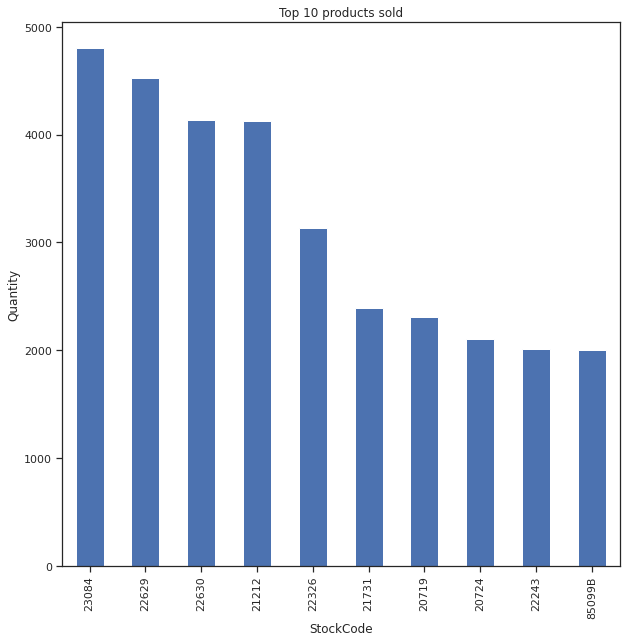

In [48]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
dfplot1_2['Quantity'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.title('Top 10 products sold')
# show the plot 顯示圖形
plt.show()

##選出購買國家第三位

In [49]:
df1[2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newInvoiceDate,Revenue
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE,2010-12-03,230.40
324705,565412,84212,"ASSORTED FLOWER COLOUR ""LEIS""",960,2011-09-04 11:36:00,0.42,14156.0,EIRE,2011-09-04,403.20
408376,571937,22266,EASTER DECORATION HANGING BUNNY,640,2011-10-20 09:28:00,0.19,14911.0,EIRE,2011-10-20,121.60
400494,571313,22197,POPCORN HOLDER,500,2011-10-17 10:42:00,0.72,14156.0,EIRE,2011-10-17,360.00
321957,565213,22950,36 DOILIES VINTAGE CHRISTMAS,432,2011-09-01 17:19:00,1.25,14911.0,EIRE,2011-09-01,540.00
...,...,...,...,...,...,...,...,...,...,...
305344,563685,23574,PACKING CHARGE,1,2011-08-18 12:26:00,7.5,14911.0,EIRE,2011-08-18,7.50
387771,570388,22423,REGENCY CAKESTAND 3 TIER,1,2011-10-10 12:37:00,12.75,14911.0,EIRE,2011-10-10,12.75
232404,557318,C2,CARRIAGE,1,2011-06-19 16:11:00,50.0,14911.0,EIRE,2011-06-19,50.00
234837,557605,C2,CARRIAGE,1,2011-06-21 12:06:00,25.0,14911.0,EIRE,2011-06-21,25.00


###★大部分被購買的產品
可優先推薦此國家的人購買

In [50]:
#可以參照購買國家第一位的程式邏輯
dfplot1_3 = df1[2].groupby(["StockCode"]).sum().sort_values(by = ["Quantity"],ascending=False).loc[:,["Quantity"]].head(10)
dfplot1_3

,Quantity
StockCode,
22197,1828
21212,1632
84991,1464
17084R,1440
22952,1440
21790,1420
22950,1356
21166,1226
23230,1175


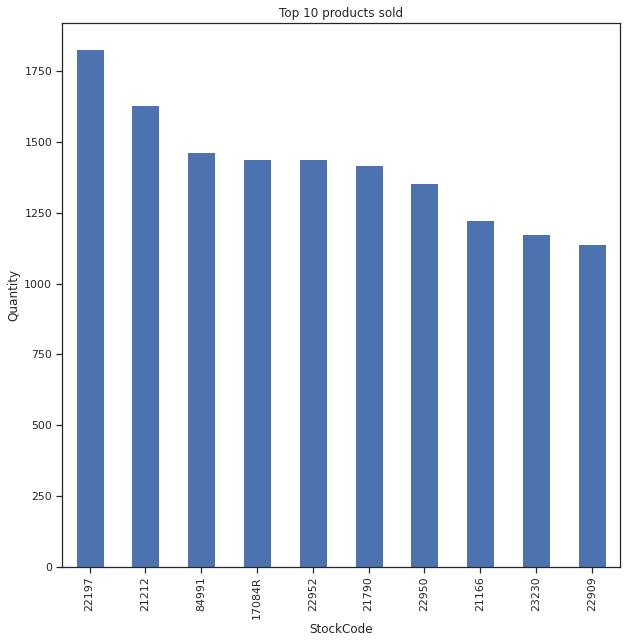

In [51]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
dfplot1_3['Quantity'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.title('Top 10 products sold')
# show the plot 顯示圖形
plt.show()

#▼營業額最大的客戶群(top50)折扣看購買清單

##資料處理

###依客戶小計，並依營業額排序，前十大客戶


####用groupby

In [52]:
#依照客戶ID小計，依營業額排序，選擇數量及營業額查看
df3 = df.groupby(df["CustomerID"]).sum().sort_values("Revenue",ascending=False).loc[:,["Quantity","Revenue"]]
#取前10項
df3_top10 = df3.head(10)
df3_top10

,Quantity,Revenue
CustomerID,,
14646.0,197420,279138.02
18102.0,64124,259657.30
17450.0,69993,194550.79
16446.0,80997,168472.50
14911.0,80513,140450.72
12415.0,77669,124564.53
14156.0,57885,117379.63
17511.0,64549,91062.38
12346.0,74215,77183.60


####用pivot_table

In [53]:
df3_1_top10 = df.pivot_table( #對客戶及利潤做樞紐分析
    #設定統計值使用CustomerID
    index=['CustomerID'],
    #統計項選擇數量及營業額
    values=["Quantity","Revenue"],
    #統計方法為加總
    aggfunc='sum',
#依照營業額排序，並取前10項
).sort_values("Revenue",ascending=False).head(10)
df3_1_top10

,Quantity,Revenue
CustomerID,,
14646.0,197420,279138.02
18102.0,64124,259657.30
17450.0,69993,194550.79
16446.0,80997,168472.50
14911.0,80513,140450.72
12415.0,77669,124564.53
14156.0,57885,117379.63
17511.0,64549,91062.38
12346.0,74215,77183.60


###前10大客戶

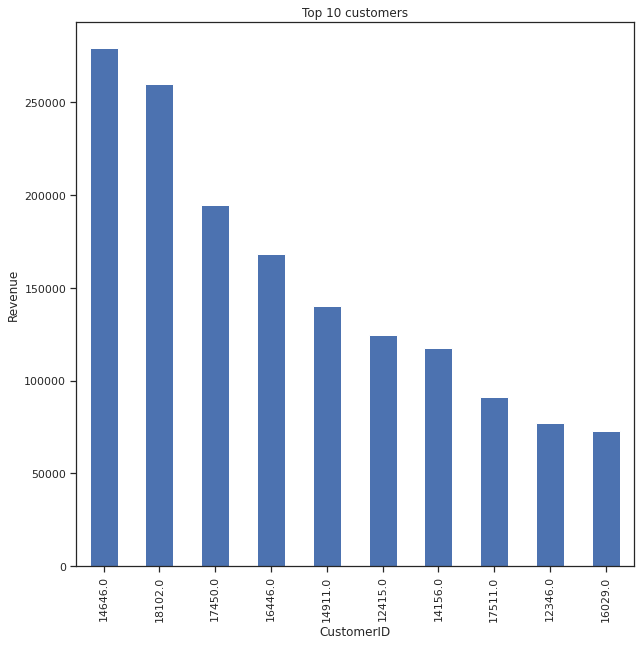

In [54]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
df3_top10['Revenue'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.title('Top 10 customers')
# show the plot 顯示圖形
plt.show()

###將客戶名單存成list

In [55]:
df3_customer_list = df3_top10.reset_index().loc[:,["CustomerID"]]["CustomerID"].tolist()
df3_customer_list

['14646.0',
 '18102.0',
 '17450.0',
 '16446.0',
 '14911.0',
 '12415.0',
 '14156.0',
 '17511.0',
 '12346.0',
 '16029.0']

###建立購買清單方程式

In [56]:
def customer_buy_list(x):
  return df.loc[
         #選出顧客ID第x項
         df['CustomerID'] == df3_customer_list[x],
         #顯示StockCode和Description
         ['StockCode', 'Description']
      #刪除重複項，並將StockCode設為Index
      ].drop_duplicates().set_index('StockCode')

###建立營業額清單方程式

In [57]:
def revenue_list(x):
  #選出顧客ID第x項並依照StockCode小計
  df3_revenue = df.loc[df['CustomerID'] == df3_customer_list[x]].groupby(["StockCode"]).sum()
  #依營業額排序取前10項
  df3_revenue = df3_revenue.sort_values(["Revenue"],ascending=False).head(10)
  #選擇數量及營業額列
  df3_revenue = df3_revenue.loc[:,["Quantity","Revenue"]]
  return df3_revenue         

###將客戶名單各別的購買清單存成list

In [59]:
#建立df3_buy_list為空list
df3_buy_list = []
#迴圈客戶清單長度
for i in range (len(df3_customer_list)):
  #引入購買清單方程式並加入df3_buy_list中
  df3_buy_list.append(customer_buy_list(i))

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


###將客戶營業額分別儲存

In [60]:
#建立df3_topcustmoer_top10為空list
df3_topcustmoer_top10 = []
#迴圈客戶清單長度
for i in range(len(df3_customer_list)):
  df3_topcustmoer_top10.append(revenue_list(i))

###最大營業額商品

In [61]:
customer_item_matrix = df.pivot_table(   # 對商品及利潤做樞紐分析
    index=['StockCode',"Description","UnitPrice"],
    values=["Revenue"],
    aggfunc='sum',
)
customer_item_matrix.reset_index(inplace=True) # 重置索引 將groupby後的欄位設成新欄位
stock_revenue = customer_item_matrix.sort_values("Revenue",ascending=False).head(50) # 將數量排序，取出前50名賣最好的商品
filter_stock_revenue = stock_revenue.reset_index(drop=True) # 再將欄位重置索引
filter_stock_revenue #前50名熱銷商品

,StockCode,Description,UnitPrice,Revenue
0,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,168469.60
1,22423,REGENCY CAKESTAND 3 TIER,10.95,93064.05
2,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,79130.48
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,50913.30
4,22423,REGENCY CAKESTAND 3 TIER,12.75,48934.50
5,22502,PICNIC BASKET WICKER 60 PIECES,649.5,39619.50
6,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69,37359.14
7,23084,RABBIT NIGHT LIGHT,1.79,35730.19
8,21137,BLACK RECORD COVER FRAME,3.39,35161.08
9,85099B,JUMBO BAG RED RETROSPOT,1.79,34253.44


##客戶購買清單

###最大客戶

####最大客戶的購買清單

In [62]:
df3_buy_list[0]

,Description
StockCode,
21981,PACK OF 12 WOODLAND TISSUES
21986,PACK OF 12 PINK POLKADOT TISSUES
22720,SET OF 3 CAKE TINS PANTRY DESIGN
21931,JUMBO STORAGE BAG SUKI
22613,PACK OF 20 SPACEBOY NAPKINS
...,...
23552,BICYCLE PUNCTURE REPAIR KIT
23598,PAPER BUNTING VINTAGE PARTY
23597,PAPER BUNTING PAISLEY PARK


####最大客戶營業額前十大商品

In [63]:
df3_topcustmoer_top10[0]

,Quantity,Revenue
StockCode,,
23084,4801,9568.48
22326,3120,7956.00
22629,4492,7415.40
22630,4096,6758.40
22328,1584,4039.20
85099B,2000,3468.00
21731,2376,3459.60
22423,288,3153.60
22243,2016,2923.20


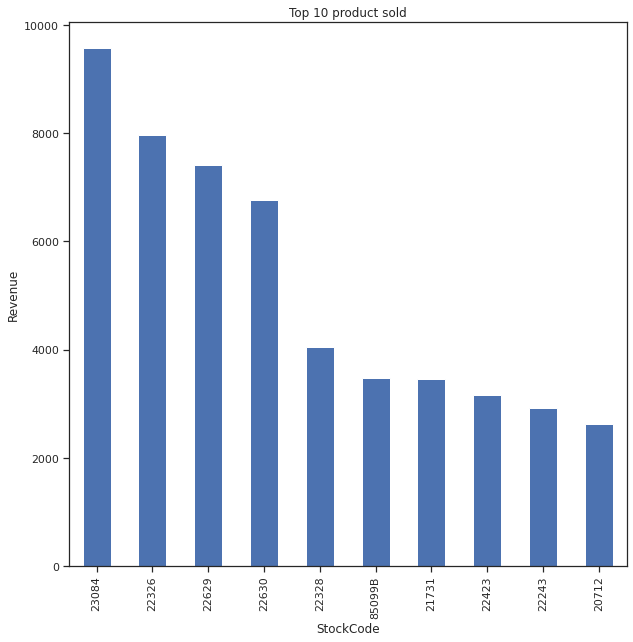

In [64]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
df3_topcustmoer_top10[0]['Revenue'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('StockCode')
plt.ylabel('Revenue')
plt.title('Top 10 product sold')
# show the plot 顯示圖形
plt.show()

###第二大客戶

####第二大客戶的購買清單

In [65]:
df3_buy_list[1]

,Description
StockCode,
82484,WOOD BLACK BOARD ANT WHITE FINISH
22830,UTILTY CABINET WITH HOOKS
22189,CREAM HEART CARD HOLDER
22188,BLACK HEART CARD HOLDER
21623,VINTAGE UNION JACK MEMOBOARD
...,...
23526,WALL ART DOG LICENCE
23543,WALL ART KEEP CALM
23535,WALL ART BICYCLE SAFETY


####第二大客戶營業額前十大商品

In [66]:
df3_topcustmoer_top10[1]

,Quantity,Revenue
StockCode,,
21623,2600,16592.08
82484,3205,15351.00
22189,5946,14089.90
22188,4104,9482.40
48194,1620,7419.60
48187,1620,7419.60
21523,1300,5954.00
48188,1270,5816.60
23134,976,5738.88


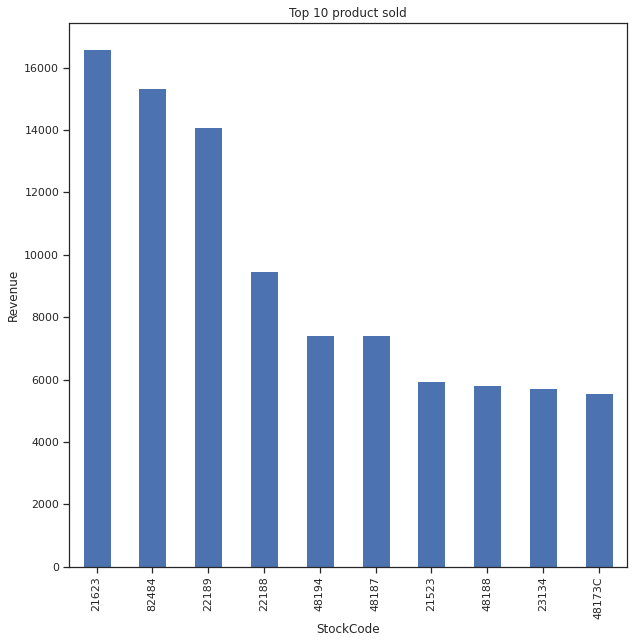

In [67]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
df3_topcustmoer_top10[1]['Revenue'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('StockCode')
plt.ylabel('Revenue')
plt.title('Top 10 product sold')
# show the plot 顯示圖形
plt.show()

###前十大客戶

####前十大客戶購買總清單

In [68]:
df3_customer_set = set(df3_customer_list)

In [69]:
df.loc[
   #取前十大客戶ID
   df['CustomerID'].isin(df3_customer_set),
   #取商品名稱及描述項 
   ['StockCode', 'Description']
#刪除重複值，並將StockCode設為index
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
84880,WHITE WIRE EGG HOLDER
85099C,JUMBO BAG BAROQUE BLACK WHITE
85099B,JUMBO BAG RED RETROSPOT
79321,CHILLI LIGHTS
22780,LIGHT GARLAND BUTTERFILES PINK
...,...
23522,WALL ART DOG AND BALL
84820,DANISH ROSE TRINKET TRAYS
21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS"


####前十大客戶購買營業額前十大商品

In [70]:
#詳細步驟如下
df3_topcustomertop10 = df.loc[df['CustomerID'].isin(df3_customer_set)].groupby(["StockCode"]).sum().sort_values(["Revenue"],ascending=False).head(10).loc[:,["Quantity","Revenue"]]
#取前十大客戶ID
#df3_topcustomertop10 = df.loc[df['CustomerID'].isin(df3_customer_set)]
#依商品小計
#df3_topcustomertop10 = df3_topcustomertop10.groupby(["StockCode"]).sum()
#依營業額排序並取前10項
#df3_topcustomertop10 = df3_topcustomertop10.sort_values(["Revenue"],ascending=False).head(10)
#取數量及營業額項
#df3_topcustomertop10 = df3_topcustomertop10.loc[:,["Quantity","Revenue"]]
df3_topcustomertop10

,Quantity,Revenue
StockCode,,
23843,80995,168469.60
23166,74984,78054.13
85123A,6162,18605.84
82484,3429,16857.70
21623,2600,16592.08
22189,5978,14216.30
22470,4558,14038.64
23243,2755,13121.23
22423,1131,12593.55


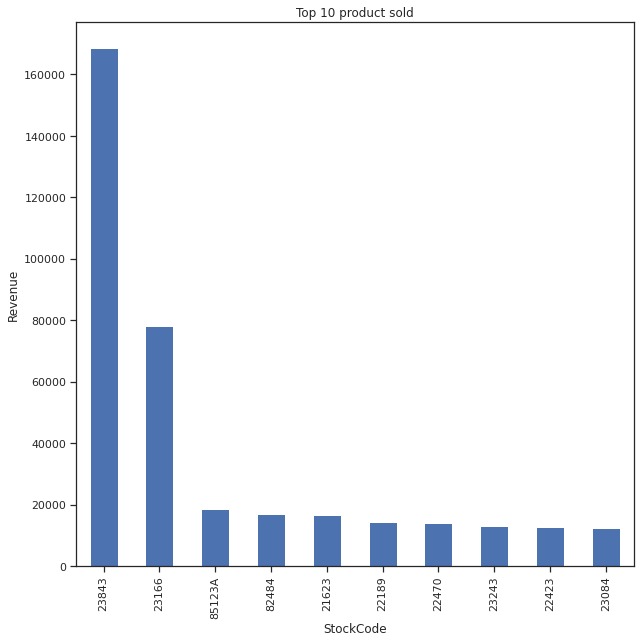

In [71]:
# create the plot 
# 設定圖片大小
plt.figure(figsize = (10, 10))
# 創建圖形
df3_topcustomertop10['Revenue'].plot(kind='bar')
# Set the title and labels
# 設置標題和標籤
plt.xlabel('StockCode')
plt.ylabel('Revenue')
plt.title('Top 10 product sold')
# show the plot 顯示圖形
plt.show()

#▼針對營業額不好的商品打折

##資料處理

###依商品小計，並依營業額排序

In [85]:
df4 = df.groupby(["StockCode"]).sum().sort_values("Revenue",ascending=False).loc[:,["Revenue"]]
df4

,Revenue
StockCode,
23843,168469.600
22423,142592.950
85123A,100603.500
85099B,85220.780
23166,81416.730
...,...
90084,0.850
90104,0.850
21268,0.840


###總營業額

In [86]:
df4.sum()

Revenue    8779824.014
dtype: float64

###百分比對應數字
df4_revenue = np.array(df4.loc[:,["Revenue"]]["Revenue"].tolist())

In [92]:
df4.loc[:,["Revenue"]]["Revenue"]

StockCode
23843     168469.600
22423     142592.950
85123A    100603.500
85099B     85220.780
23166      81416.730
             ...    
90084          0.850
90104          0.850
21268          0.840
84227          0.420
PADS           0.003
Name: Revenue, Length: 3663, dtype: float64

In [96]:
#將營業額資料取出存成array
df4_revenue = np.array(df4.loc[:,["Revenue"]]["Revenue"].tolist())
#設定百分位數25,50,75，利用math.ceil函式處理 後面減1是因為index從0開始
percentage_25 = sorted(df4_revenue)[int(math.ceil((len(df4_revenue) * 25) / 100)) - 1]
percentage_50 = sorted(df4_revenue)[int(math.ceil((len(df4_revenue) * 50) / 100)) - 1]
percentage_75 = sorted(df4_revenue)[int(math.ceil((len(df4_revenue) * 75) / 100)) - 1]

##商品打折清單

###★營業額後25%的購買清單
(最低的25%)

In [99]:
df4_buy_list_25 = df4.loc[df4["Revenue"] <= percentage_25]
df4_buy_set_25 = set(df4.reset_index().loc[:,["StockCode"]]["StockCode"].tolist())

In [76]:
df.loc[
         df['StockCode'].isin(df4_buy_set_25),
         ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
90214W,"LETTER ""W"" BLING KEY RING"
90214Z,"LETTER ""Z"" BLING KEY RING"
90089,PINK CRYSTAL SKULL PHONE CHARM


###營業額後25%~50%的購買清單
(偏低的25%~50%)

In [77]:
df4_buy_list_25_50 = df4.loc[df4["Revenue"] > percentage_25]
df4_buy_list_25_50 = df4_buy_list_25_50.loc[df4_buy_list_25_50["Revenue"] <= percentage_50]
df4_buy_set_25_50 = set(df4_buy_list_25_50.reset_index().loc[:,["StockCode"]]["StockCode"].tolist())

In [78]:
df.loc[
         df['StockCode'].isin(df4_buy_set_25_50),
         ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21724,PANDA AND BUNNIES STICKER SHEET
21883,STARS GIFT TAPE
85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN
71270,PHOTO CLIP LINE
22261,FELT EGG COSY WHITE RABBIT
...,...
23580,SNACK TRAY HAPPY FOREST
23575,SNACK TRAY PAISLEY PARK
23560,SET OF 6 RIBBONS COUNTRY STYLE


###營業額50%~75%的購買清單
(偏高的50%~75%)

In [79]:
df4_buy_list_50_75 = df4.loc[df4["Revenue"] > percentage_50]
df4_buy_list_50_75 = df4_buy_list_50_75.loc[df4_buy_list_50_75["Revenue"] <= percentage_75]
df4_buy_set_50_75 = set(df4_buy_list_50_75.reset_index().loc[:,["StockCode"]]["StockCode"].tolist())

In [80]:
df.loc[
         df['StockCode'].isin(df4_buy_set_50_75),
         ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
22310,IVORY KNITTED MUG COSY
84969,BOX OF 6 ASSORTED COLOUR TEASPOONS
22913,RED COAT RACK PARIS FASHION
22912,YELLOW COAT RACK PARIS FASHION
22914,BLUE COAT RACK PARIS FASHION
...,...
23413,DECORATIVE VINTAGE COFFEE BOX
23598,PAPER BUNTING VINTAGE PARTY
23597,PAPER BUNTING PAISLEY PARK


###營業額75%的購買清單
(最高的75%到100%)

In [81]:
df4_buy_list_75 = df4.loc[df4["Revenue"] > percentage_75]
df4_buy_set_75 = set(df4_buy_list_75.reset_index().loc[:,["StockCode"]]["StockCode"].tolist())

In [82]:
df.loc[
         df['StockCode'].isin(df4_buy_set_75),
         ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
23552,BICYCLE PUNCTURE REPAIR KIT
23498,CLASSIC BICYCLE CLIPS
21175,GIN AND TONIC DIET METAL SIGN
